# One-dimensional Gaussian products and refactoring
A notebook to "build intuition".

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define variables in one-d
y = 4.
M = 1.
mu = 0.
C = 3.
Lambda = 16.

In [3]:
# execute the one-d solution
A = 1. / (1. / Lambda + M ** 2 / C)
a = A * (mu / Lambda + M * y / C)
B = C + M ** 2 * Lambda
b = M * mu

In [4]:
# Gaussian function
def N(x, m, V):
    return 1. / np.sqrt(2 * np.pi * V) * np.exp(-0.5 * (x - m) ** 2 / V)

In [5]:
thetas = np.linspace(-10., 10., 1024)

Text(0.5, 0, '$\\theta$')

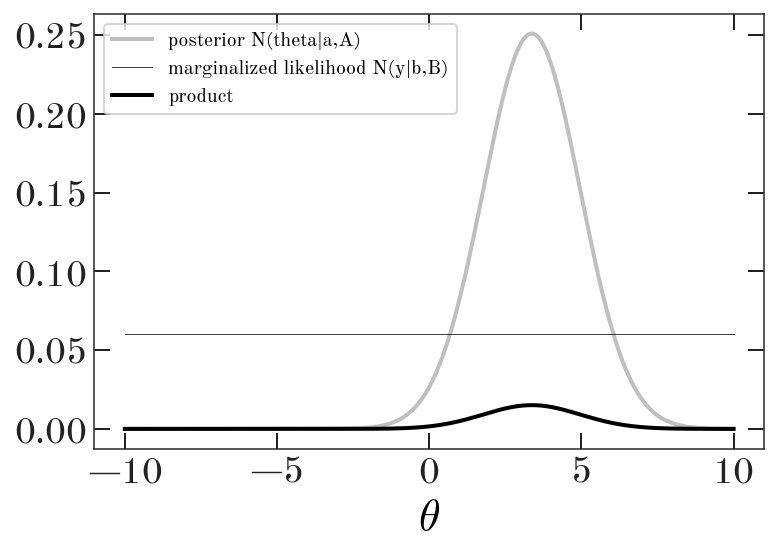

In [6]:
plt.plot(thetas, N(thetas, a, A), "k-", alpha=0.25, lw=2.0, label="posterior N(theta|a,A)")
plt.plot(thetas, 0. * thetas + N(y, b, B), "k-", alpha=0.75, lw=0.5, label="marginalized likelihood N(y|b,B)")
plt.plot(thetas, N(y, b, B) * N(thetas, a, A), "k-", lw=2., label="product")
foo = plt.ylim()
plt.legend(loc="upper left")
plt.xlabel(r"$\theta$")

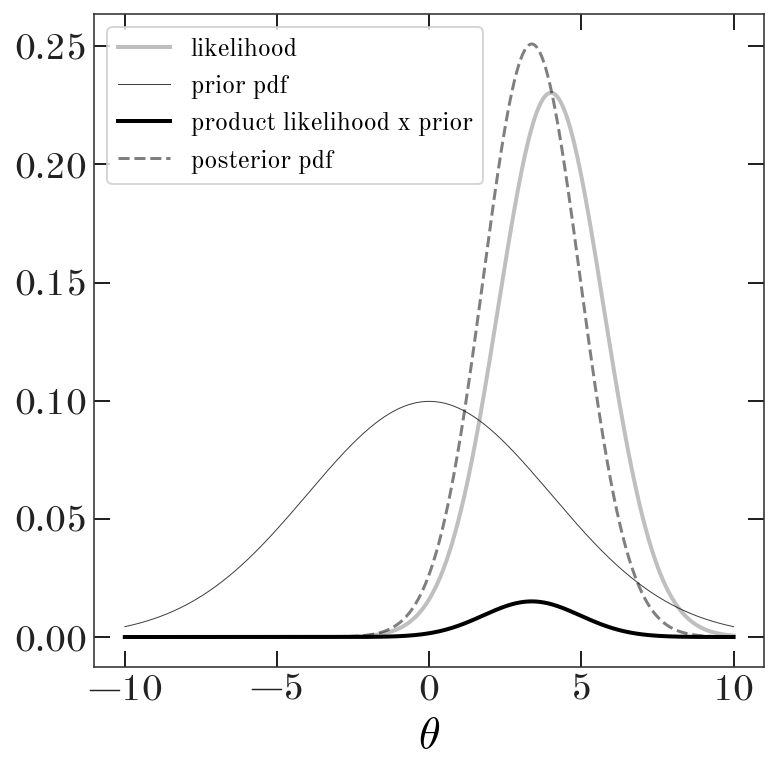

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(thetas, N(y, M * thetas, C), "k-", alpha=0.25, lw=2.0, label=r"likelihood")
plt.plot(thetas, N(thetas, mu, Lambda), "k-", alpha=0.75, lw=0.5, label=r"prior pdf")
plt.plot(thetas, N(y, M * thetas, C) * N(thetas, mu, Lambda), "k-", lw=2., label="product likelihood x prior")
plt.plot(thetas, N(thetas, a, A), "k--", alpha=0.5, label="posterior pdf")
plt.ylim(foo)
plt.legend(loc="upper left", fontsize=13)
plt.xlabel(r"$\theta$")
plt.savefig("../paper/oned.pdf")

Text(0.5, 0, '$\\theta$')

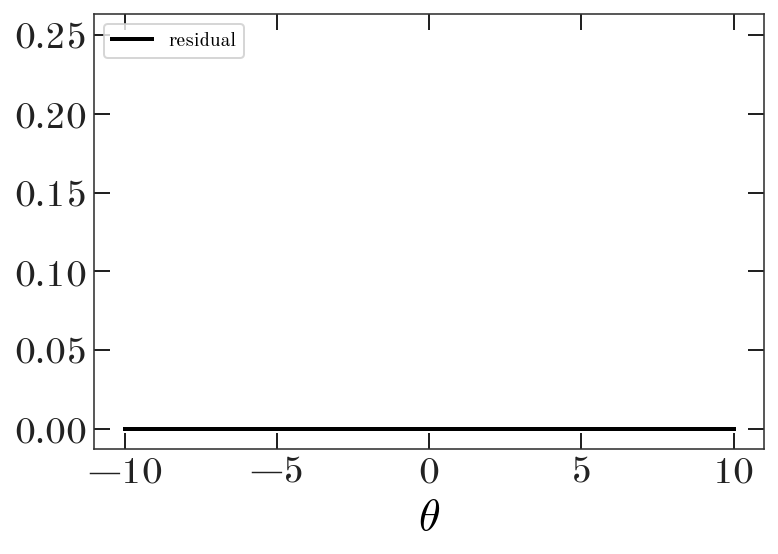

In [8]:
plt.plot(thetas, N(thetas, a, A) * N(y, b, B) - N(y, M * thetas, C) * N(thetas, mu, Lambda), "k-", lw=2., label="residual")
plt.ylim(foo)
plt.legend(loc="upper left")
plt.xlabel(r"$\theta$")